In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df_train= pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df_train.shape

(1258, 6)

In [ ]:
df_train ['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

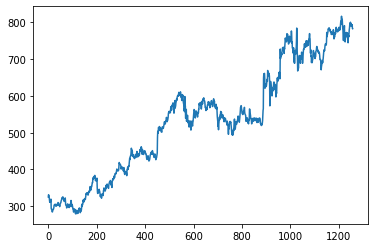

In [ ]:
plt.plot(df_train['Open'])

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(df_train[['Open']])

In [ ]:
x_scale.shape

(1258, 1)

In [ ]:
x_scale[0:0+60+1]

In [ ]:
len(x_scale[0:0+60+1,0])

61

In [ ]:
X_temp=[]
for i in range(0,1258-60):
    temp=x_scale[i:i+61,0]
    X_temp.append(temp)

In [ ]:
len(X_temp)

1198

In [ ]:

X=np.array(X_temp)

In [ ]:
X.shape

(1198, 61)

In [ ]:
 X = X[:,:-1]

In [ ]:
y = X[:,-1]

In [ ]:
X = X.reshape(-1,60,1)

In [ ]:
X.shape

(1198, 60, 1)

In [ ]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model= Sequential()
model.add (LSTM(50 ,return_sequences=True, input_shape= (60,1)))
model.add (LSTM(50, return_sequences=True ))
model.add (LSTM(50 ,return_sequences=True ))
model.add (LSTM(50, return_sequences=False))
model.add (Dense(1))

In [ ]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
hist = model.fit(X,y,batch_size=32,epochs=50)

Epoch 1/50
38/38 [==============================] - 7s 14ms/step - loss: 0.1238
Epoch 2/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 3/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 4/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 5/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 8/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 9/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 10/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 11/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 12/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 13/50
38/38 [==================

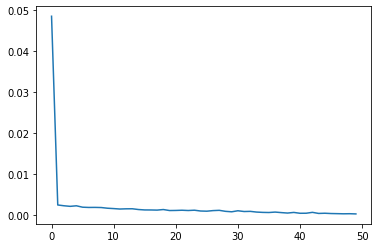

In [ ]:
plt.plot(hist.history['loss'])

In [ ]:
y_pre=model.predict(X)

In [ ]:
y_pre= scaler.inverse_transform(y_pre)

In [ ]:
 t= df_train['Open'][60:].reset_index(drop=True)

In [ ]:
t

0       325.50
1       324.66
2       319.19
3       321.50
4       318.03
         ...  
1193    790.90
1194    790.68
1195    793.70
1196    783.33
1197    782.75
Name: Open, Length: 1198, dtype: float64

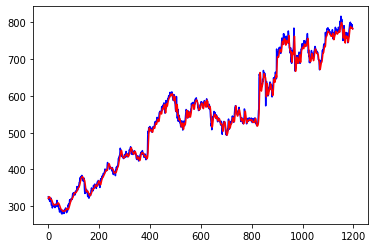

In [ ]:
plt.plot(t,color='blue')
plt.plot(y_pre,color='red')